<h1><center>EDA Notebook<center><h1>

# My libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress  # for linear regression
import statsmodels.formula.api as smf  # for multiple regression

from colorama import Fore   # optional (used to change color of the text from print() )

# Using data to answer questions
> - Find appropriate data, or collect it
> - Read data in your development environment
> - Clean and validate

## My datasets are in a folder named as datasets

## I will begin with exploring my data

In [2]:
data1 = pd.read_hdf('Datasets/nsfg.hdf5')
data1.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [3]:
data1.shape

(9358, 10)

In [4]:
data1.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 9357
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   caseid        9358 non-null   int64  
 1   outcome       9358 non-null   int64  
 2   birthwgt_lb1  6485 non-null   float64
 3   birthwgt_oz1  6391 non-null   float64
 4   prglngth      9358 non-null   int64  
 5   nbrnaliv      6485 non-null   float64
 6   agecon        9358 non-null   int64  
 7   agepreg       9109 non-null   float64
 8   hpagelb       6485 non-null   float64
 9   wgt2013_2015  9358 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 804.2 KB


In [6]:
data1.describe()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
count,9358.000000,9358.000000,6485.000000,6391.000000,9358.000000,6485.000000,9358.000000,9109.000000,6485.000000,9358.000000
mean,65502.392605,1.773990,8.055204,7.213895,29.896345,1.018042,2446.330199,2494.934570,28.992136,10759.200147
std,2953.471315,1.348648,11.178893,8.254885,13.685389,0.160433,579.392363,578.099231,10.367124,11400.179222
min,60418.000000,1.000000,0.000000,0.000000,0.000000,1.000000,750.000000,825.000000,5.000000,1859.105000
25%,62875.750000,1.000000,6.000000,3.000000,14.000000,1.000000,1983.000000,2041.000000,23.000000,4340.053407
50%,65499.000000,1.000000,7.000000,6.000000,38.000000,1.000000,2366.000000,2416.000000,27.000000,7062.994158
75%,68111.000000,2.000000,8.000000,11.000000,39.000000,1.000000,2850.000000,2900.000000,33.000000,12629.322982
max,70619.000000,6.000000,99.000000,99.000000,48.000000,8.000000,4350.000000,4350.000000,99.000000,75399.410000


## Then I will start in cleaning and validating

In [7]:
# babies weight in pound is found in birthwgt_lb1 column and weight in ounces is found in birthwgt_oz1 column
weight_pounds = data1['birthwgt_lb1']
weight_ounces = data1['birthwgt_oz1']

In [8]:
print('there is' , weight_pounds.isna().sum(), 'NAN Value !!')

there is 2873 NAN Value !!


In [9]:
weight_pounds.describe()
# there is unclean data here as you can see some babies has weight 0 and others 99 :(
# so I nead to clean this data

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [10]:
weight_pounds.value_counts()

7.0     2146
6.0     1666
8.0     1168
5.0      586
9.0      363
4.0      196
99.0      94
10.0      82
3.0       67
2.0       47
1.0       34
11.0      17
12.0       7
0.0        6
14.0       2
13.0       2
98.0       1
17.0       1
Name: birthwgt_lb1, dtype: int64

### Adding some visualizations

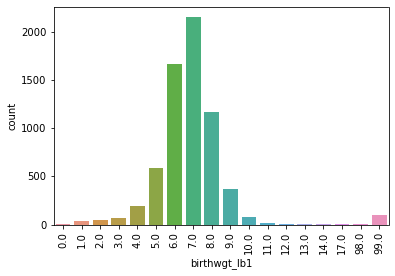

In [11]:
sns.countplot(x=weight_pounds)

plt.xticks(rotation=90)
plt.show()
# as you can see I have to get rid of data with weight 98 and 99

### I will replace fake data by nan

In [12]:
weight_pounds.replace([98,99],np.nan,inplace=True)

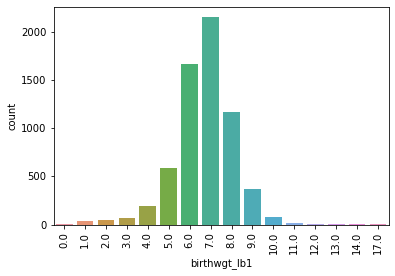

In [13]:
sns.countplot(x=weight_pounds)

plt.xticks(rotation=90)
plt.show()

# Arthimatic operations with pandas series

In [14]:
weight = weight_pounds + weight_ounces/16
weight

0       5.2500
1       4.7500
2       5.2500
3          NaN
4       8.8125
         ...  
9353    4.6875
9354    8.4375
9355    7.3750
9356    8.1875
9357    8.3125
Length: 9358, dtype: float64

In [15]:
weight.describe()

count    6390.000000
mean        7.153267
std         1.485002
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

# Filtering and visualizing

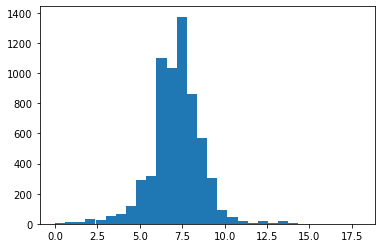

In [16]:
plt.hist(weight.dropna(),bins=30)
plt.show()

### Now I want to filter prglngth data to know babies who are preterm and who is not

In [17]:
preterm = data1['prglngth'] < 37
print('number of preterm babies is :',preterm.sum())

number of preterm babies is : 3742


In [18]:
print('mean preterm babies is :',preterm.mean())

mean preterm babies is : 0.39987176747168196


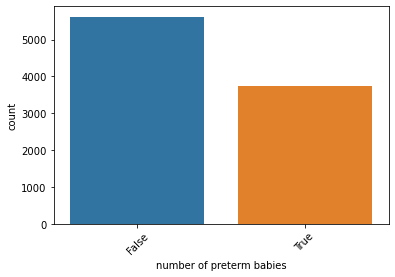

In [19]:
sns.countplot(x=preterm,order=[False, True])

plt.xticks(rotation=45)
plt.xlabel('number of preterm babies')
plt.show()

# Exploring relationships

In [20]:
data2 = pd.read_hdf('Datasets/brfss.hdf5')
data2.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0



### as known a good way to visualize data is by using scatter plots 
### so we can use seaborn or matplotlib

Making scatter plot using line plot :


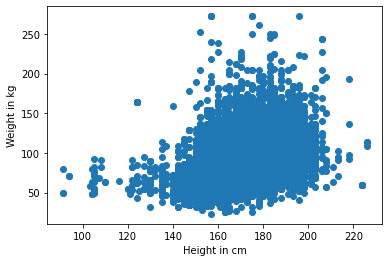

Making scatter plot using plt.scatter :


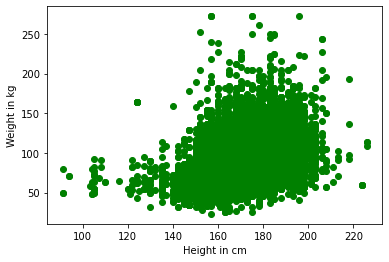

In [21]:
height = data2['HTM4']
weight = data2['WTKG3']

plt.plot(height,weight,linestyle='None',marker='o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
print(Fore.BLUE + 'Making scatter plot using line plot :')
plt.show()

## --------------------------------------------------------------------------- ##

plt.scatter(height,weight,color='green')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
print(Fore.GREEN + 'Making scatter plot using plt.scatter :')
plt.show()

## as you they are the same

## Customizing the shape to make it looks more better

Making scatter plot using line plot :


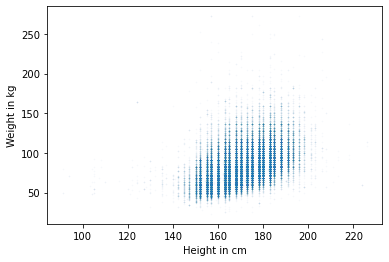

Making scatter plot using plt.scatter :


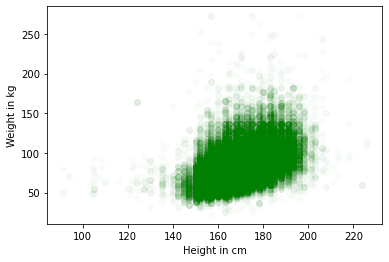

In [22]:
plt.plot(height,weight,linestyle='None',marker='o',alpha=0.02,markersize=1)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
print(Fore.BLUE + 'Making scatter plot using line plot :')
plt.show()

## --------------------------------------------------------------------------- ##

plt.scatter(height,weight,color='green',alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
print(Fore.GREEN + 'Making scatter plot using plt.scatter :')
plt.show()

### We can Jitter the data

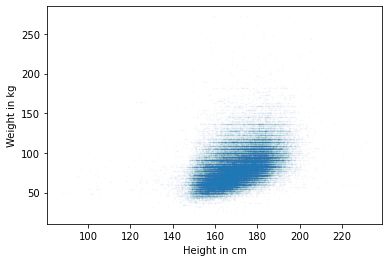

In [23]:
height_jitter = height + np.random.normal(0,2,size=len(data2))
plt.plot(height_jitter,weight,linestyle='None',marker='o',alpha=0.02,markersize=1)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### Jittering height and weight

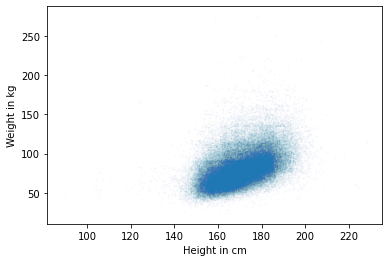

In [24]:
height_jitter = height + np.random.normal(0,2,size=len(data2))
weight_jitter = weight + np.random.normal(0,2,size=len(data2))

plt.plot(height_jitter,weight_jitter,linestyle='None',marker='o',alpha=0.02,markersize=1)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

## Zoom into the area

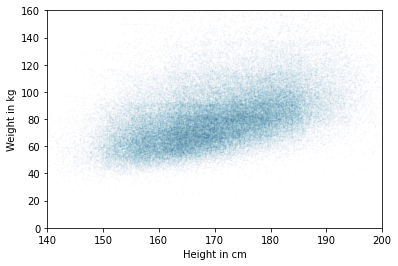

In [25]:
plt.plot(height_jitter,weight_jitter,linestyle='None',marker='o',alpha=0.02,markersize=1)
plt.axis([140,        # left limit
          200,        # right limit
          0,          # lower limit
          160         # upper limit
         ])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

# Now a good reliable picture

# Visualizing relationships

### Ok let's do as the previous example yo show relation between age and weight

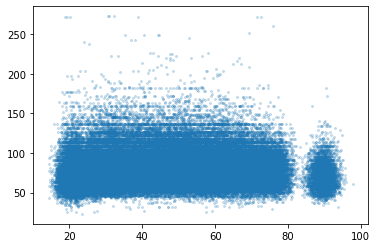

In [26]:
age = data2['AGE']
weight = data2['WTKG3']
age_jitter = age + np.random.normal(0,2,size=len(data2))

plt.plot(age_jitter,weight,linestyle='None',marker='o',alpha=0.2,markersize=2)


plt.show()

### Which looks really bad !!

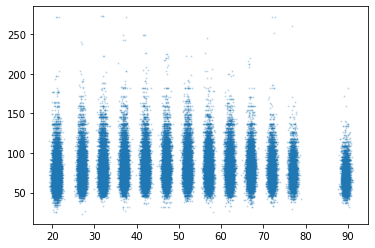

In [27]:
age_jitter = age + np.random.normal(0,0.5,size=len(data2))  # low jittering in age to make data not much jittered for each col
weight_jitter = weight + np.random.normal(0,2,size=len(data2))

plt.plot(age_jitter,weight,linestyle='None',marker='o',alpha=0.2,markersize=1)
plt.show()

### Which is much better, But what if I want to make a KDE plot for each column.... <br>Such thing is done by violin plot (from seaborn) but we need to drop nan values first

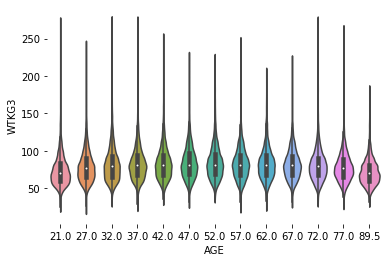

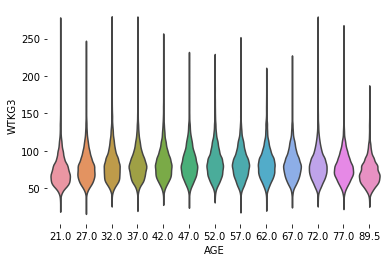

In [28]:
violin_data = data2.dropna(subset=['AGE','WTKG3'])
sns.violinplot(x='AGE',y='WTKG3',data=violin_data)
sns.despine(left=True, bottom=True)          

plt.show()

# we can make inner equals none

violin_data = data2.dropna(subset=['AGE','WTKG3'])
sns.violinplot(x='AGE',y='WTKG3',data=violin_data,inner=None)
sns.despine(left=True, bottom=True)

plt.show()

# much better to see :)

### We can also use boxplot for visualizing

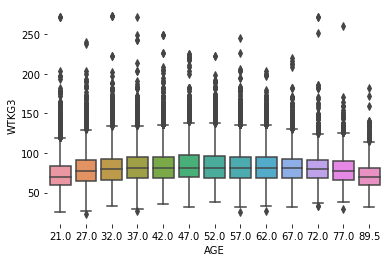

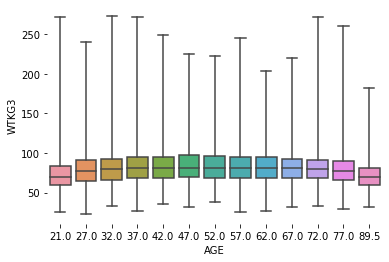

In [29]:
box_data = data2.dropna(subset=['AGE','WTKG3'])
sns.boxplot(x='AGE',y='WTKG3',data=box_data)
sns.despine(left=True, bottom=True)

plt.show()

# Adding whiskers will make it much better

box_data = data2.dropna(subset=['AGE','WTKG3'])
sns.boxplot(x='AGE',y='WTKG3',data=box_data,whis=10)
sns.despine(left=True, bottom=True)

plt.show()

### As you know boxplots show 25% and 75% in boxes and whis for min and max and mid line for median

## Ok let's look on y data using log scale

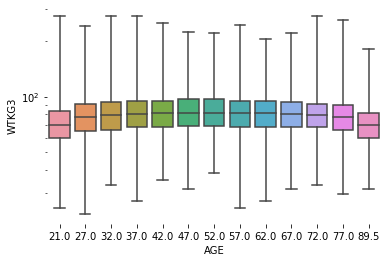

In [30]:
sns.boxplot(x='AGE',y='WTKG3',data=box_data,whis=10)

plt.yscale('log')
sns.despine(left=True, bottom=True)
plt.show()

# Correlations

### In statistics, it usually means Pearson's correlation coefficient, which is a number between -1 and 1 that quantifies the strength of a linear relationship between variables.

In [31]:
corr_data = data2[['AGE','WTKG3','HTM4']]
corr_data.corr()

,AGE,WTKG3,HTM4
AGE,1.000000,0.021641,-0.093684
WTKG3,0.021641,1.000000,0.474203
HTM4,-0.093684,0.474203,1.000000


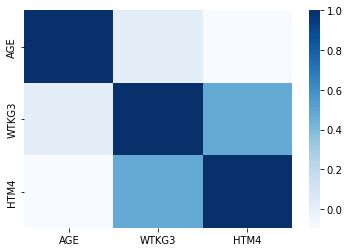

In [32]:
sns.heatmap(corr_data.corr(),
           cmap="Blues"
           )

plt.show()

###### The result is a "correlation matrix". Reading across the first row, the correlation of HTM4 with itself is 1. That's expected; the correlation of anything with itself is 1.<br><br> The next entry is more interesting; the correlation of height and weight is about 0.47 . It's positive, which means taller people are heavier, and it is moderate in strength, which means it has some predictive value. If you know someone's height, you can make a better guess about their weight, and vice versa.<br><br> The correlation between height and age is about -0 point 09. It's negative, which means that older people tend to be shorter, but it's weak, which means that knowing someone's age would not help much if you were trying to guess their height.<br><br> The correlation between age and weight is even smaller. It is tempting to conclude that there is no relationship between age and weight, but we have already seen that there is. So why is the correlation so low?<br><br>Remember that the relationship between weight and age looks like this. People in their 40s are the heaviest; younger and older people are lighter. So this relationship is nonlinear.

### This means that when we have a non-linear data this will lead to small correlation value 

# Using simple regression to know slope and relations in data

### I will work on that figure

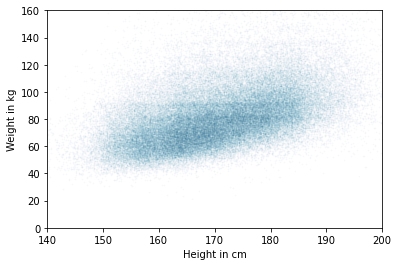

In [33]:
plt.plot(height_jitter,weight_jitter,linestyle='None',marker='o',alpha=0.02,markersize=1)
plt.axis([140,        # left limit
          200,        # right limit
          0,          # lower limit
          160         # upper limit
         ])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### Now I want to draw a line showing slope of data (there is a way to do so using regplot in seaborn but here I will use scipy and you can find regplot way in seaborn second notebook)

In [34]:
cols_for_slope = data2.dropna(subset=['HTM4','WTKG3'])
X = cols_for_slope['HTM4']
Y = cols_for_slope['WTKG3']

line_for_slope = linregress(X,Y)         # from scipy library
print(line_for_slope)

LinregressResult(slope=0.9192115381848297, intercept=-75.12704250330233, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802998, intercept_stderr=0.9608860265433182)


#### Recall math linear function y = mx + c
> - slope=0.9192115381848297 :  m
> - X :  x
> - intercept=-75.12704250330233 :  c <br>
#### Now let's plot curve y = mx+c 

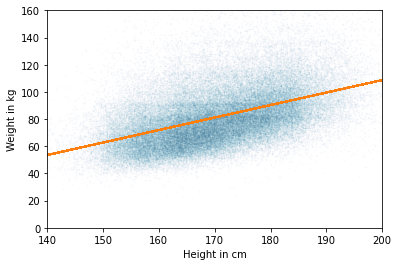

In [35]:
plt.plot(height_jitter,weight_jitter,linestyle='None',marker='o',alpha=0.02,markersize=1)
plt.plot(X,line_for_slope.slope*X + line_for_slope.intercept)
plt.axis([140,        # left limit
          200,        # right limit
          0,          # lower limit
          160         # upper limit
         ])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

## Note That : <br> It is only usefull when dealing with linear data

# Multiple regression

### Here we will need to use a library named as statsmodels which I imported... Let's use it on previous example and see the results

In [36]:
cols_for_slope = data2.dropna(subset=['HTM4','WTKG3'])
line_for_slope2 = smf.ols('WTKG3 ~ HTM4',data=cols_for_slope).fit()
line_for_slope2.params

Intercept   -75.127043
HTM4          0.919212
dtype: float64

### As you can see it gives the same results

In [37]:
# Run regression with linregress
subset = data2.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs,ys)
print(Fore.BLUE ,res, '\n\n')

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=data2).fit()
print(Fore.LIGHTBLUE_EX ,results.params)

 LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591) 


 Intercept    1.528779
INCOME2      0.069880
dtype: float64


### Same results :)

In [38]:
data3 = pd.read_hdf('Datasets/gss.hdf5')
data3

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.889300
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.444600
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.333900
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.889300
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.889300
...,...,...,...,...,...,...,...,...,...,...
62461,2016,32.0,1984.0,1,1,13.0,74880.0,1.0,NaN,0.956994
62462,2016,61.0,1955.0,2,1,16.0,65520.0,NaN,1.0,0.956994
62463,2016,67.0,1949.0,2,1,13.0,NaN,NaN,2.0,1.564363
62464,2016,57.0,1959.0,2,1,12.0,9945.0,2.0,NaN,0.956994


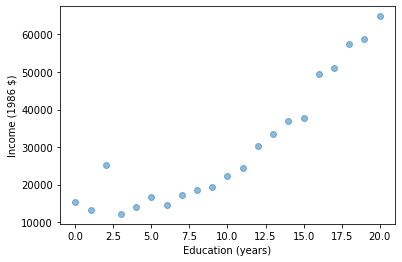

In [39]:
# Group by educ
grouped = data3.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, linestyle='None', marker = 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

### Here I will use smf to see slope with 2 variables to know how will the functions depend on each other

In [40]:
# Add a new column with educ squared
data3['educ2'] = data3['educ'] ** 2
data3['age2'] = data3['age'] ** 2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2',data=data3).fit() 
## we use realinc column and we want to see relations relative to educ and my created educ2 column and age and age2

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


### I can notice that  It gave me slope for educ, educ2, age and age2 columns

# Visualizing regression results
### Using the previous example

In [41]:
# Add a new column with educ squared
data3['educ2'] = data3['educ'] ** 2
data3['age2'] = data3['age'] ** 2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2',data=data3).fit() 
## we use realinc column and we want to see relations relative to educ and my created educ2 column and age and age2

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


In [42]:
dataframe_for_visualizing = pd.DataFrame()    # Here I created empty dataframe

dataframe_for_visualizing['age'] = np.linspace(18,85) # column for ages from 18 to 85
dataframe_for_visualizing['age2'] = dataframe_for_visualizing['age'] ** 2 # column for ages squared from 18 to 85
dataframe_for_visualizing['educ'] = 12 # column for education (12 for education for all rows)
dataframe_for_visualizing['educ2'] = dataframe_for_visualizing['educ'] ** 2 # column for education squared (144 for education for all rows)

dataframe_for_visualizing

,age,age2,educ,educ2
0,18.000000,324.000000,12,144
1,19.367347,375.094127,12,144
2,20.734694,429.927530,12,144
3,22.102041,488.500208,12,144
4,23.469388,550.812162,12,144
5,24.836735,616.863390,12,144
6,26.204082,686.653894,12,144
7,27.571429,760.183673,12,144
8,28.938776,837.452728,12,144
9,30.306122,918.461058,12,144


In [43]:
pred12 = results.predict(dataframe_for_visualizing)
pred12
# this is predicting real income (realinc) based on my new dataframe "dataframe_for_visualizing"

0     18422.699989
1     19864.036105
2     21241.067963
3     22553.795565
4     23802.218909
5     24986.337997
6     26106.152827
7     27161.663401
8     28152.869717
9     29079.771777
10    29942.369580
11    30740.663126
12    31474.652414
13    32144.337446
14    32749.718221
15    33290.794739
16    33767.567000
17    34180.035004
18    34528.198751
19    34812.058241
20    35031.613474
21    35186.864451
22    35277.811170
23    35304.453632
24    35266.791837
25    35164.825786
26    34998.555477
27    34767.980911
28    34473.102089
29    34113.919009
30    33690.431673
31    33202.640080
32    32650.544229
33    32034.144122
34    31353.439758
35    30608.431136
36    29799.118258
37    28925.501123
38    27987.579731
39    26985.354082
40    25918.824176
41    24787.990013
42    23592.851593
43    22333.408916
44    21009.661982
45    19621.610791
46    18169.255343
47    16652.595638
48    15071.631677
49    13426.363458
dtype: float64

In [44]:
# Group by age
grouped = data3.groupby('age')

# Compute mean income in each group
mean_income_by_age = grouped['realinc'].mean()

### Now for visualizing the data

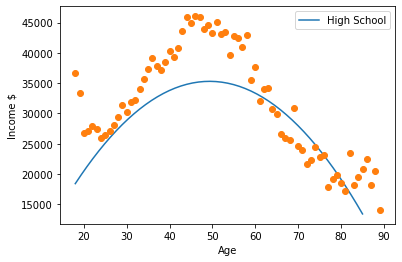

In [45]:
plt.plot(dataframe_for_visualizing['age'],pred12,label='High School')
plt.plot(mean_income_by_age, marker='o',linestyle='None')

plt.xlabel('Age')
plt.ylabel('Income $')
plt.legend()

plt.show()

### Where this shows the model prediction function with real data as scatter plot

### I will do same for other ages (14, 16)

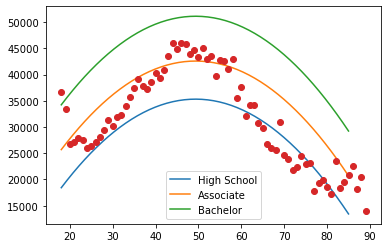

In [46]:
dataframe_for_visualizing['educ'] = 12 # column for education (12 for education for all rows)
dataframe_for_visualizing['educ2'] = dataframe_for_visualizing['educ'] ** 2
pred12 = results.predict(dataframe_for_visualizing)
plt.plot(dataframe_for_visualizing['age'],pred12,label='High School')

dataframe_for_visualizing['educ'] = 14
dataframe_for_visualizing['educ2'] = dataframe_for_visualizing['educ'] ** 2
pred14 = results.predict(dataframe_for_visualizing)
plt.plot(dataframe_for_visualizing['age'],pred14,label='Associate')

dataframe_for_visualizing['educ'] = 16
dataframe_for_visualizing['educ2'] = dataframe_for_visualizing['educ'] ** 2
pred16 = results.predict(dataframe_for_visualizing)
plt.plot(dataframe_for_visualizing['age'],pred16,label='Bachelor')

plt.plot(mean_income_by_age, marker='o',linestyle='None')

plt.legend()
plt.show()

# Logistic Regression

In [47]:
data3[['gunlaw','sex']]
# this is categorical data

,gunlaw,sex
0,2.0,1
1,1.0,2
2,1.0,1
3,1.0,2
4,2.0,1
...,...,...
62461,1.0,1
62462,NaN,2
62463,NaN,2
62464,2.0,2


In [48]:
data3['gunlaw'].replace(2,0,inplace=True)

In [49]:
data3[['gunlaw','sex']]
# this is categorical data

,gunlaw,sex
0,0.0,1
1,1.0,2
2,1.0,1
3,1.0,2
4,0.0,1
...,...,...
62461,1.0,1
62462,NaN,2
62463,NaN,2
62464,0.0,2


In [50]:
results = smf.logit('gunlaw ~ age + age2 + educ + educ2 + C(sex)',data=data3).fit()
## Note sex column is written as C(sex) to show that it is categorical

results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

### positive values are associated with things that make the outcome more likely; negative values make the outcome less likely. For example, the parameter associated with sex=2 is 0.75, which indicates that women are more likely to support this form of gun control. To see how much more likely,<br><br> we can generate and plot predictions, as we did with linear regression.

In [51]:
dataframe_for_visualizing = pd.DataFrame()

dataframe_for_visualizing['age'] = np.linspace(18,89)
dataframe_for_visualizing['educ'] = 12
dataframe_for_visualizing['age2'] = dataframe_for_visualizing['age'] ** 2
dataframe_for_visualizing['educ2'] = dataframe_for_visualizing['educ'] ** 2
dataframe_for_visualizing

,age,educ,age2,educ2
0,18.000000,12,324.000000,144
1,19.448980,12,378.262807,144
2,20.897959,12,436.724698,144
3,22.346939,12,499.385673,144
4,23.795918,12,566.245731,144
5,25.244898,12,637.304873,144
6,26.693878,12,712.563099,144
7,28.142857,12,792.020408,144
8,29.591837,12,875.676801,144
9,31.040816,12,963.532278,144


In [52]:
dataframe_for_visualizing['sex'] = 1
pred1 = results.predict(dataframe_for_visualizing)
dataframe_for_visualizing['sex'] = 2
pred2 = results.predict(dataframe_for_visualizing)

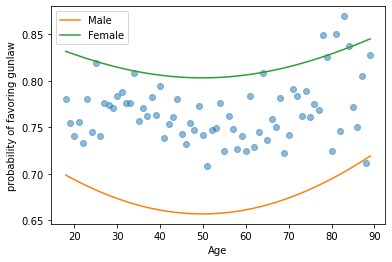

In [53]:
grouped = data3.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age,'o',alpha=0.5)

plt.plot(dataframe_for_visualizing['age'],pred1,label='Male')
plt.plot(dataframe_for_visualizing['age'],pred2,label='Female')
plt.xlabel('Age')
plt.ylabel('probability of favoring gunlaw')

plt.legend()
plt.show()

<h1><center>This Is The End Of This NoteBook<center><h1>